In [1]:
import os
import wave
import librosa
import librosa.display
import numpy as np
import pandas as pd
from pydub import AudioSegment

# Задайте путь к папке с данными
data_dir = '/Users/muslim/Desktop/Education/MachineLearning/BabyCryClassification-main/data'

# Создайте список для хранения признаков и меток
features = []
labels = []

# Пройдемся по каждой папке
for category in [ 'discomfort' , 'hungry' , 'belly_pain' , 'burping' ,'lonely']:
    category_path = os.path.join(data_dir, category)
    
    # Пройдемся по каждому файлу в папке
    for filename in os.listdir(category_path):
        if filename.endswith('.wav'):
            file_path = os.path.join(category_path, filename)
            
            try: 
                # Попытка открыть аудиофайл с помощью библиотеки wave
                with wave.open(file_path, 'rb') as audio_file:
                    audio_data = audio_file.readframes(-1)
                    sr = audio_file.getframerate()
                    audio = np.frombuffer(audio_data, dtype=np.int16)
                    
                # Преобразуйте данные в числа с плавающей точкой
                audio = audio.astype(np.float64)
                
                # Извлечем признаки из аудиофайла
                mfccs = librosa.feature.mfcc(y=audio, sr=sr)
                mfccs_mean = np.mean(mfccs, axis=1)
                
                # Добавим признаки и метку к соответствующим спискам
                features.append(mfccs_mean)
                labels.append(category)
                
            except Exception as e:
                #print(f"Ошибка при обработке файла {file_path}: {str(e)}")
                continue

# Создадим DataFrame для хранения данных
data = pd.DataFrame(features)
data['label'] = labels

# Сохраните данные в CSV-файл, если понадобится
data.to_csv('child_cry_data.csv', index=False)

/opt/anaconda3/lib/python3.12/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [3]:
data

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,label
0,870.859785,-19.797174,-5.597549,0.049230,-9.170204,1.086308,-15.891971,-2.950560,1.954929,0.321245,...,-3.468324,-12.408079,-0.780993,-8.525477,0.328768,-2.887862,-0.124278,0.079411,0.597245,discomfort
1,707.415396,36.191026,-5.270712,-0.382151,-13.485688,-11.599171,-18.936614,-12.767104,-15.649129,-11.513748,...,-7.151433,-15.776743,-9.035276,-13.371982,-3.864588,-8.783977,-6.767050,-6.116937,-3.101730,discomfort
2,799.248716,106.592679,-2.445994,7.357971,-19.878783,2.573099,-10.899930,11.729693,-12.498250,3.451674,...,0.606093,-9.115725,-4.215300,-10.588123,-12.566606,-7.815026,-11.519175,-10.227161,-11.434193,discomfort
3,870.402685,39.309826,-45.877896,-12.443055,-37.649213,-6.565716,-3.212038,-7.274230,-0.085237,2.608939,...,-4.674004,-11.347644,-7.098446,-5.969485,-0.830960,-2.173499,0.505592,-4.842111,-3.345675,discomfort
4,707.415396,36.191026,-5.270712,-0.382151,-13.485688,-11.599171,-18.936614,-12.767104,-15.649129,-11.513748,...,-7.151433,-15.776743,-9.035276,-13.371982,-3.864588,-8.783977,-6.767050,-6.116937,-3.101730,discomfort
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,688.562135,1.283540,1.135775,0.389296,0.442543,-0.345519,-1.583573,-1.971378,-1.872347,-0.771914,...,-0.678591,-1.070212,0.022304,0.950376,1.226870,1.566886,1.137564,1.291327,0.983308,lonely
541,874.804238,29.702646,-12.365928,3.103789,-3.510680,-5.759028,6.305069,-1.008646,-3.122507,0.158302,...,-1.019265,4.217019,3.462488,1.800437,-0.750202,-3.194541,-4.281256,-3.368844,-3.666486,lonely
542,855.753211,63.564025,-25.590757,6.483912,0.431641,-16.792488,5.858459,1.703919,-7.158952,1.630427,...,-8.073884,-1.309252,2.808752,3.678586,2.520879,1.098941,-1.700688,-5.551794,-3.982122,lonely
543,740.695833,3.453891,2.273527,1.434399,1.073968,2.412133,3.639315,1.103108,-0.551763,-0.776646,...,0.586348,1.655935,0.309427,-1.767239,-2.999933,-2.580041,-0.560745,0.065574,-1.228166,lonely


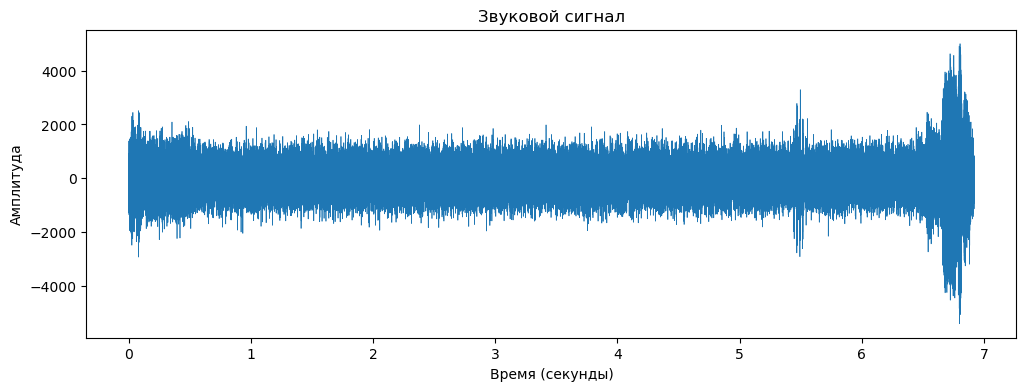

In [5]:
# Визуализация аудиофайла
import matplotlib.pyplot as plt

# Создайте временную ось для отображения аудио
time = np.arange(0, len(audio)) / sr

# Постройте график аудиофайла
plt.figure(figsize=(12, 4))
plt.plot(time, audio, lw=0.5)
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')
plt.title('Звуковой сигнал')
plt.show()


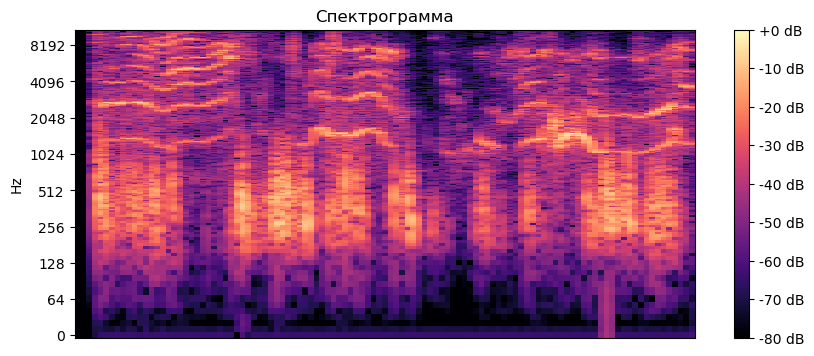

In [26]:
import librosa.display

# Создайте спектрограмму
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max), y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Спектрограмма')
plt.show()


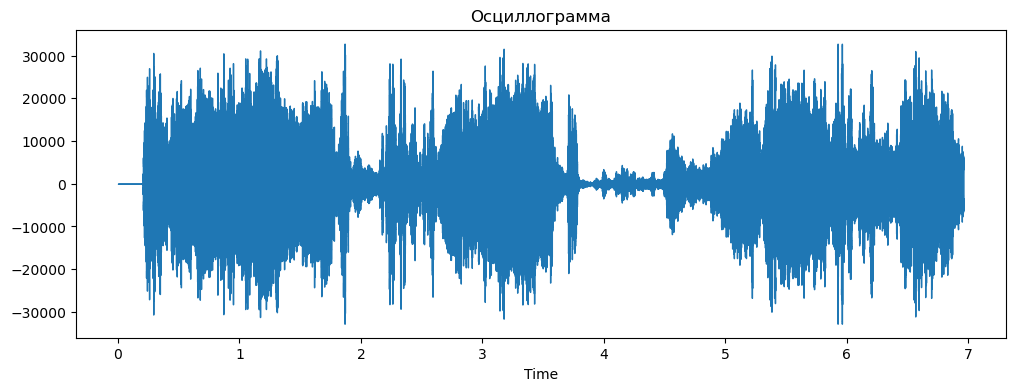

In [28]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(audio, sr=sr)
plt.title('Осциллограмма')
plt.show()


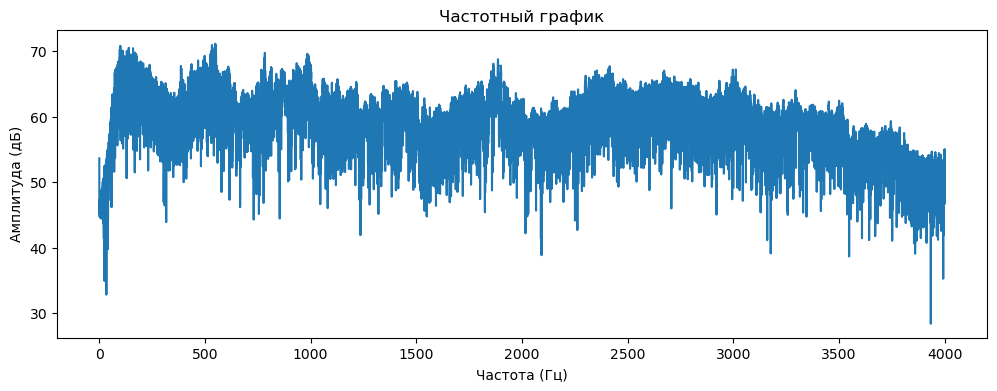

In [30]:
spectrum = np.abs(np.fft.fft(audio))
f = np.fft.fftfreq(len(spectrum), 1/sr)

plt.figure(figsize=(12, 4))
plt.plot(f[:len(f)//2], 10 * np.log10(spectrum[:len(f)//2]))
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда (дБ)')
plt.title('Частотный график')
plt.show()


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Загрузите данные из CSV-файла
data = pd.read_csv('child_cry_data.csv')

# Разделите данные на признаки (X) и метки (y)
X = data.drop ( ['label'] , axis=1)  # Исключаем последний столбец 'label'
y = data['label']

# Разделите данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создайте модель случайного леса и обучите ее
model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Сделайте прогнозы на тестовом наборе данных
y_pred = model.predict(X_test)

# Оцените производительность модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Выведите отчет о классификации
report = classification_report(y_test, y_pred)
print(report)


Accuracy: 0.88
              precision    recall  f1-score   support

  belly_pain       0.50      0.75      0.60         4
     burping       0.82      0.47      0.60        19
  discomfort       1.00      0.38      0.55         8
      hungry       0.93      0.93      0.93        29
      lonely       0.89      0.98      0.93       104

    accuracy                           0.88       164
   macro avg       0.83      0.70      0.72       164
weighted avg       0.88      0.88      0.87       164



In [9]:
combined = pd.DataFrame(dict(actual=y_test , prediction=y_pred))

In [11]:
pd.crosstab(index=combined['actual'] , columns=combined['prediction'])

prediction,belly_pain,burping,discomfort,hungry,lonely
actual,,,,,
belly_pain,3,0,0,1,0
burping,2,9,0,0,8
discomfort,1,0,3,1,3
hungry,0,0,0,27,2
lonely,0,2,0,0,102


In [35]:
import pickle

In [36]:
pickle_out = open("BabyCryModel.pkl" , "wb")

In [37]:
pickle.dump(model , pickle_out)

In [38]:
pickle_out.close()